In [3]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'omar-vargas-bucket'
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#Reading the data-file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#Dropping No
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
from sklearn.model_selection import train_test_split

#Defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
from sklearn.linear_model import LinearRegression

#Building the linear model
lm_md = LinearRegression().fit(X_train, Y_train)

In [17]:
#Predicting on test
lm_pred = lm_md.predict(X_test)
lm_pred

array([43.2904245 , 44.8368075 , 48.42984337, 47.43328095, 12.07273377,
       29.37738551, 25.81214604, 45.35997622, 36.91715256, 44.94618523,
       45.62607717, 14.63525615, 33.58808618, 40.37081093, 39.1839883 ,
       42.42002725, 51.94717967, 40.78003859, 44.17720847, 48.17595456,
       35.63616656, 36.89755099, 43.15587058, 41.5957898 , 29.39676115,
       44.24185972, 45.06278221, 32.20685093, 14.29251849,  7.718394  ,
       37.99550298, 30.1968892 , 30.98573873, 52.82895293, 49.65680845,
       32.43564297, 14.79186809, 34.52688653, 13.94802831, 47.03460489,
       39.80874989, 44.33452768, 42.50278498, 48.0441761 , 45.6901808 ,
       47.40585033, 47.98931486, 22.94389842, 47.40585033, 40.30101323,
       13.89679186, 50.12842526, 47.40585033, 31.9289073 , 45.90038336,
       14.82727049, 45.8903927 , 45.9178623 , 35.81691986,  7.77325524,
       51.83424527, 30.77598877, 29.8657376 , 40.13418494, 43.30950792,
       38.43715811, 51.09024977, 45.73579964, 47.6734219 , 45.03

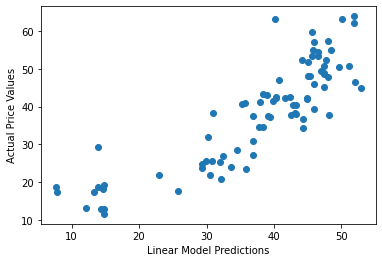

In [18]:
import matplotlib.pyplot as plt

plt.scatter(lm_pred, Y_test)
plt.xlabel('Linear Model Predictions')
plt.ylabel('Actual Price Values')
plt.show()

In [19]:
#Computing the mse
np.mean((Y_test - lm_pred)**2)

47.98718521285555